In [1]:
import pandas as pd

## Делаем быструю обработку датасета

In [3]:
adult = pd.read_csv('adult.csv')

In [4]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
adult = adult.drop(columns=['fnlwgt', 'education'])

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
cat_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in cat_columns:
    le = LabelEncoder()
    adult[col] = le.fit_transform(adult[col])

In [8]:
y = adult['income']
X = adult.drop(columns='income')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
sts = StandardScaler()
X_train = sts.fit_transform(X_train)
X_test = sts.transform(X_test)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Edward\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Обучаем модель

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict_proba(X_test)[:, 1]

base_auc_score = roc_auc_score(y_test, preds)
base_auc_curve = roc_curve(y_test, preds)

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


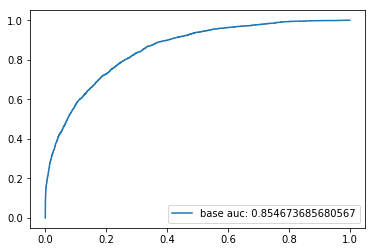

In [14]:
plt.plot(base_auc_curve[0], base_auc_curve[1], label='base auc: {}'.format(base_auc_score))
plt.legend()
plt.show()

In [15]:
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1.0, 10.0]

In [16]:
params, lines, scores = [], [], []

for p in penalty:
    for c in C:
        lr = LogisticRegression(penalty=p, C=c)
        
        lr.fit(X_train, y_train)
        preds = lr.predict_proba(X_test)[:, 1]
        
        params.append((p, c))
        scores.append(roc_auc_score(y_test, preds))
        lines.append(roc_curve(y_test, preds))

C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edward\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

auc l1_0.001: 0.84153916216884
auc l1_0.01: 0.8542734596766066
auc l1_0.1: 0.8546515354508544
auc l1_1.0: 0.8546729439292258
auc l1_10.0: 0.8546761922885485
auc l2_0.001: 0.849574042897782
auc l2_0.01: 0.8541469143399973
auc l2_0.1: 0.854666268167153
auc l2_1.0: 0.854673685680567
auc l2_10.0: 0.8546752459161473


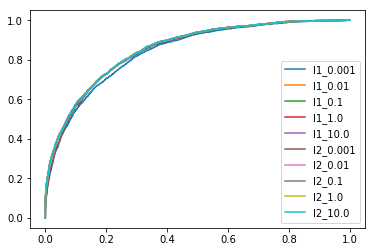

In [17]:
for i in range(len(params)):
    print("auc {}_{}: {}".format(params[i][0], params[i][1], scores[i]))
    plt.plot(lines[i][0], lines[i][1], label="{}_{}".format(params[i][0], params[i][1]))
    
plt.legend()
plt.show()